In [1]:
import pandas as pd
import os.path
import os
import h5py
import numpy as np
import tqdm
import itertools
import matplotlib.pyplot as plt
from matplotlib import colors

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    torch.cuda.empty_cache()
if device.type == 'cpu':
    print("Using cpu")

In [2]:
from data import (SpectraDataset, preprocess_dataset, prepare_dataset_scalers)

In [3]:
# check if data has nans or spectra <= 0
# preprocess_dataset(data_dir=os.getcwd()+'/',
#                    fname_x = "X_afgpy.h5",
#                    fname_y = "Y_afgpy.h5")

# prepare files for normalization and training
# prepare_dataset_scalers(data_dir=os.getcwd()+'/',
#                         out_dir=os.getcwd()+'/',
#                         fname_x = "X_afgpy.h5",
#                         fname_y = "Y_afgpy.h5")

# initialize dataset loader
data = SpectraDataset(working_dir=os.getcwd()+'/')

# load dataset
data.load_and_normalize_data(data_dir=None, limit=None, fname_x = "X_afgpy.h5", fname_y = "Y_afgpy.h5")

times=(128,) freq=(64,)


Text(0.5, 1.0, 'Data distribution')

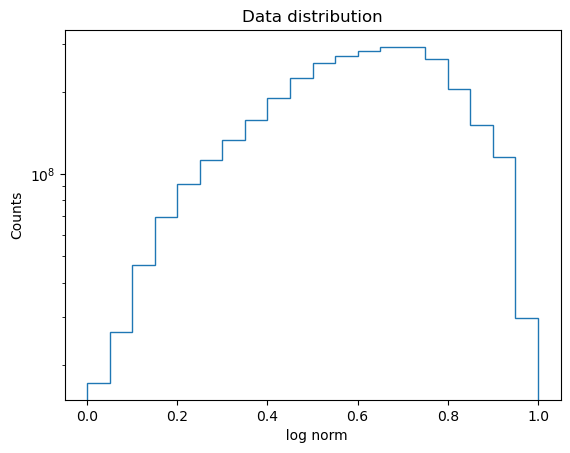

In [5]:
counts, bins = np.histogram(data.X_norm, bins=20)
plt.stairs(counts, bins)
plt.yscale("log")
plt.xlabel("# counds of ")
plt.ylabel("Counts")
plt.title("Data distribution")

In [6]:
print(data.X_norm.shape)

(393216, 128, 64)


# Create subset of actual data for testing/debuggin

In [8]:
lim = 1000
indices = list(range(lim))
np.random.shuffle(indices)
with h5py.File(data.working_dir+"X.h5","w") as f:
    f.create_dataset(name="X", data=data.X[indices])
    f.create_dataset(name="times", data=data.times)
    f.create_dataset(name="freqs", data=data.freqs)
with h5py.File(data.working_dir+"Y.h5","w") as f:
    f.create_dataset(name="Y", data=data.y[indices])
    f.create_dataset(name="keys", data=np.array(list(data.feature_names),dtype="S"))